<a href="https://colab.research.google.com/github/ShirsaM/My-Google-Colab-/blob/main/Extracting_Stock_Data_using_a_Python_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracting Stock Data using a Python Library**

A company's stock share is a piece of the company more precisely:

A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares."

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.

You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. **We will use the yfinance library**, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 36.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=0aa09cf8d2f7c8fb77561bb04f1d54e6619f3ab2d12d5beb4282ecb9b298d7ea
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import yfinance as yf

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is AAPL.

In [ ]:
amd = yf.Ticker("AMD")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.

Using the attribute `info` we can extract information about the stock as a Python dictionary.

In [ ]:
details = amd.info
details

{'52WeekChange': 0.48908222,
 'SandP52WeekChange': 0.36312246,
 'address1': '2485 Augustine Drive',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 0,
 'askSize': 1100,
 'averageDailyVolume10Day': 27330328,
 'averageVolume': 42531428,
 'averageVolume10days': 27330328,
 'beta': 2.030978,
 'beta3Year': None,
 'bid': 0,
 'bidSize': 1200,
 'bookValue': 5.331,
 'category': None,
 'circulatingSupply': None,
 'city': 'Santa Clara',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'dateShortInterest': 1622160000,
 'dayHigh': 81.445,
 'dayLow': 78.965,
 'dividendRate': None,
 'dividendYield': None,
 'earningsQuarterlyGrowth': 2.426,
 'enterpriseToEbitda': 43.119,
 'enterpriseToRevenue': 8.335,
 'enterpriseValue': 95207735296,
 'exDividendDate': 798940800,
 'exchange': 'NMS',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'expireDate': None,
 'fiftyDayAverage': 78.84706,
 'fiftyTwoWeekHig

In [8]:
details["country"]

'United States'

In [9]:
details["volume"]

29598309

In [12]:
details["sector"]

'Technology'

### Extracting Share Price
A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time. Using the `history()` method we can get the share price of the stock over a certain period of time. Using the `period parameter` we can set how far back from the present to get data. **The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.**

In [16]:
shares = amd.history(period= "max")
shares

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.000000,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.000000,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.000000,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.000000,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.000000,3.020833,2.906250,2.916667,130800,0,0.0
...,...,...,...,...,...,...,...
2021-06-10,80.019997,81.709999,79.699997,81.559998,28606400,0,0.0
2021-06-11,81.610001,82.330002,80.699997,81.309998,24290800,0,0.0
2021-06-14,81.510002,81.550003,80.199997,81.550003,27830200,0,0.0


The format that the data is returned in is a `Pandas DataFrame`. With the Date as the index the share Open, High, Low, Close, Volume, and Stock Splits are given for each day.

In [17]:
shares["Volume"].max()

325058400

We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace paramter` to True so the change takes place to the DataFrame itself.

In [18]:
shares.reset_index(inplace=True)

We can plot the Open price against the Date:

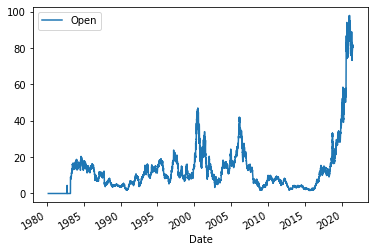

In [19]:
shares.plot(x = "Date" , y = "Open")

### Extracting Dividends

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.

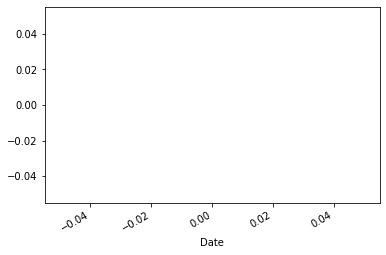

In [21]:
amd.dividends.plot()